<a href="https://colab.research.google.com/github/MrYousri97/Spark-Intern/blob/main/Task%202/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting using Unsupervised ML
**Grip Internship Program**

**Task 2**

**Author Mahmoud Yousri**

## K-Means clustering
## import Libraries

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline

## Reading data

In [ ]:
iris=datasets.load_iris()
data= pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Describe Data

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Elbow method

In [ ]:
from sklearn.cluster import KMeans
x=data.iloc[:,:].values
WCSS=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

## Plotting Elbow method


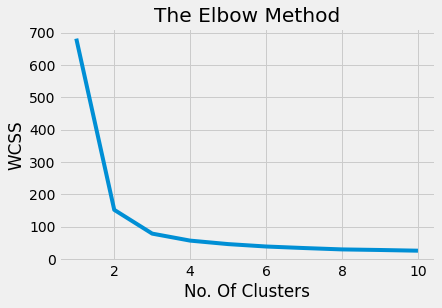

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.show()


we see that 3 is optimal number to be number of clusters

## Applying K-Means to dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

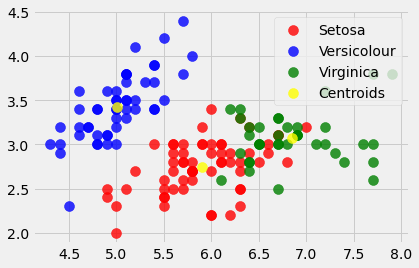

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red',alpha=0.8, label = 'Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue',alpha=0.8, label = 'Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green',alpha=0.8, label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow',alpha=0.8, label = 'Centroids')

plt.legend()
plt.show()